A practical introduction to Pandas
===================

We have been asked to *analyze an otp dataset*, without much more information. This kind of scenario is more common than you might imagine!

## 1) Quickly examine the attached file. What does it contain, in both technical and functional terms? (Use any tool you want)

In [2]:
! ls -lh On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_9.zip

-rw-r--r-- 1 dani plugdev 30M nov 29 15:19 On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_9.zip


In this example, I am using the shell from within this notebook, with the ! notation:

A ! sign before a line tells the notebook to send that line straight away to the underlying OS. 

\* Note that the specific commands available under the ! sign are dependent on the OS.

### Check what the file contains

In [2]:
zip_path = 'On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_9.zip'
! unzip -l {zip_path} 

Archive:  On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_9.zip
  Length      Date    Time    Name
---------  ---------- -----   ----
272856955  2019-11-04 17:15   On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.csv
    12152  2019-11-04 17:15   readme.html
---------                     -------
272869107                     2 files


Oh, it has a readme! Always good to read it.

### Unzip the readme to the current directory

Use the shell of your OS or the GUI.

Remember, since zip files contain several compressed files, we need to specify which one we want.

In [5]:
! unzip -o {zip_path} readme.html

Archive:  On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_9.zip
  inflating: readme.html             


### Take a look at the beginning of the readme file

using the shell

In [6]:
! head readme.html

<HTML>
<HEAD>
	<TITLE> readme.html </TITLE>
</HEAD>
<BODY>
	<TABLE><TR><TD COLSPAN=2><H4>BACKGROUND</H4></TD></TR>
	<TR><TD COLSPAN=2>The data contained in the compressed file has been extracted from the 
	Reporting Carrier On-Time Performance (1987-present) data table of the "On-Time" database from the TranStats data library. 
	The time period is indicated in the name of the compressed file; 
	for example, XXX_XXXXX_2001_1 contains data of the first month of the year 2001. </TD></TR>


The readme file is html. Luckily, we are working in an html environment. 

### Display the contents of `readme.html` within the notebook
(Hint: check out [IPython.display.IFrame](https://ipython.org/ipython-doc/3/api/generated/IPython.display.html))

In [10]:
from IPython.display import IFrame

IFrame('https://www.elpais.com', 800, 300)

In [12]:
IFrame('readme.html', 800, 600)

That's some very good documentation!

### Summary: 

The files within the zip are " quoted csv's. They contain information on timeliness of departures in the US, at the departure level.

### Load some of the data (one of the files) into memory as a pandas dataframe. What functions do you need to use?

Pro tip: there is no need to decompress the whole file. Check out [zipfile.ZipFile](https://docs.python.org/3/library/zipfile.html)

First, open a connection to one of the files

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
pd.read_csv('On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_9.zip')

ValueError: ('Multiple files found in compressed zip file %s', "['On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.csv', 'readme.html']")

In [9]:
from zipfile import ZipFile

zf = ZipFile(zip_path)
zf

<zipfile.ZipFile filename='On_Time_Reporting_Carrier_On_Time_Performance_1987_present_2019_9.zip' mode='r'>

zip_file is a connection to the compressed file, the .zip. We can use it to open a connection to one of the files it contains, which will behave like a normal uncompressed file that we had opened with open()

In [10]:
zf.filelist[0]

<ZipInfo filename='On_Time_Reporting_Carrier_On_Time_Performance_(1987_present)_2019_9.csv' compress_type=deflate filemode='-rw-r--r--' file_size=272856955 compress_size=30506023>

In [11]:
csv = zf.open(zf.filelist[0])
csv.readline()

b'"Year","Quarter","Month","DayofMonth","DayOfWeek","FlightDate","Reporting_Airline","DOT_ID_Reporting_Airline","IATA_CODE_Reporting_Airline","Tail_Number","Flight_Number_Reporting_Airline","OriginAirportID","OriginAirportSeqID","OriginCityMarketID","Origin","OriginCityName","OriginState","OriginStateFips","OriginStateName","OriginWac","DestAirportID","DestAirportSeqID","DestCityMarketID","Dest","DestCityName","DestState","DestStateFips","DestStateName","DestWac","CRSDepTime","DepTime","DepDelay","DepDelayMinutes","DepDel15","DepartureDelayGroups","DepTimeBlk","TaxiOut","WheelsOff","WheelsOn","TaxiIn","CRSArrTime","ArrTime","ArrDelay","ArrDelayMinutes","ArrDel15","ArrivalDelayGroups","ArrTimeBlk","Cancelled","CancellationCode","Diverted","CRSElapsedTime","ActualElapsedTime","AirTime","Flights","Distance","DistanceGroup","CarrierDelay","WeatherDelay","NASDelay","SecurityDelay","LateAircraftDelay","FirstDepTime","TotalAddGTime","LongestAddGTime","DivAirportLandings","DivReachedDest","Div

In [12]:
csv.readline()

b'2019,3,9,2,1,2019-09-02,"NK",20416,"NK","N631NK","1004",11697,1169706,32467,"FLL","Fort Lauderdale, FL","FL","12","Florida",33,14100,1410005,34100,"PHL","Philadelphia, PA","PA","42","Pennsylvania",23,"2055","",,,,,"2000-2059",,"","",,"2343","",,,,,"2300-2359",1.00,"B",0.00,168.00,,,1.00,992.00,4,,,,,,"",,,0,,,,,"",,,"",,,"","","",,,"",,,"","","",,,"",,,"","","",,,"",,,"","","",,,"",,,"","",\n'

Now we're ready to load the file into memory as a pandas dataframe. Remember to close the connections to the files!

In [13]:
df = pd.read_csv(csv)
df.head()

/home/dani/anaconda3/envs/master2019/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (48,76,77,84) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,2019,3,9,3.1,2,2019-09-03,NK,20416,NK.1,N620NK,...,Unnamed: 100,Unnamed: 101,Unnamed: 102,Unnamed: 103,Unnamed: 104,Unnamed: 105,Unnamed: 106,Unnamed: 107,Unnamed: 108,Unnamed: 109
0,2019,3,9,4,3,2019-09-04,NK,20416,NK,N665NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,3,9,5,4,2019-09-05,NK,20416,NK,N672NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,3,9,6,5,2019-09-06,NK,20416,NK,N671NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,9,7,6,2019-09-07,NK,20416,NK,N675NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,3,9,8,7,2019-09-08,NK,20416,NK,N657NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
csv.readline()

b''

In [15]:
csv = zf.open(zf.filelist[0])
df = pd.read_csv(csv)
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2019,3,9,2,1,2019-09-02,NK,20416,NK,N631NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,3,9,3,2,2019-09-03,NK,20416,NK,N620NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,3,9,4,3,2019-09-04,NK,20416,NK,N665NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,9,5,4,2019-09-05,NK,20416,NK,N672NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,3,9,6,5,2019-09-06,NK,20416,NK,N671NK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's start examining the data: show the beginning of the file. How many records does it contain?

In [16]:
df.sample(5)

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,...,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
543306,2019,3,9,30,1,2019-09-30,UA,19977,UA,N76526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
460957,2019,3,9,18,3,2019-09-18,B6,20409,B6,N2002J,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
305652,2019,3,9,28,6,2019-09-28,AA,19805,AA,N801NN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260895,2019,3,9,8,7,2019-09-08,WN,19393,WN,N956WN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
127333,2019,3,9,25,3,2019-09-25,OO,20304,OO,N732SK,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
df.shape

(605979, 110)

In [49]:
pd.options.display.max_columns = None

In [50]:
df.head()

,Year,Quarter,Month,DayofMonth,DayOfWeek,FlightDate,Reporting_Airline,DOT_ID_Reporting_Airline,IATA_CODE_Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac,DestAirportID,DestAirportSeqID,DestCityMarketID,Dest,DestCityName,DestState,DestStateFips,DestStateName,DestWac,CRSDepTime,DepTime,DepDelay,DepDelayMinutes,DepDel15,DepartureDelayGroups,DepTimeBlk,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrTime,ArrDelay,ArrDelayMinutes,ArrDel15,ArrivalDelayGroups,ArrTimeBlk,Cancelled,CancellationCode,Diverted,CRSElapsedTime,ActualElapsedTime,AirTime,Flights,Distance,DistanceGroup,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,FirstDepTime,TotalAddGTime,LongestAddGTime,DivAirportLandings,DivReachedDest,DivActualElapsedTime,DivArrDelay,DivDistance,Div1Airport,Div1AirportID,Div1AirportSeqID,Div1WheelsOn,Div1TotalGTime,Div1LongestGTime,Div1WheelsOff,Div1TailNum,Div2Airport,Div2AirportID,Div2AirportSeqID,Div2WheelsOn,Div2TotalGTime,Div2LongestGTime,Div2WheelsOff,Div2TailNum,Div3Airport,Div3AirportID,Div3AirportSeqID,Div3WheelsOn,Div3TotalGTime,Div3LongestGTime,Div3WheelsOff,Div3TailNum,Div4Airport,Div4AirportID,Div4AirportSeqID,Div4WheelsOn,Div4TotalGTime,Div4LongestGTime,Div4WheelsOff,Div4TailNum,Div5Airport,Div5AirportID,Div5AirportSeqID,Div5WheelsOn,Div5TotalGTime,Div5LongestGTime,Div5WheelsOff,Div5TailNum,Unnamed: 109
0,2019,3,9,2,1,2019-09-02,NK,20416,NK,N631NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2055,NaN,NaN,NaN,NaN,NaN,2000-2059,NaN,NaN,NaN,NaN,2343,NaN,NaN,NaN,NaN,NaN,2300-2359,1.0,B,0.0,168.0,NaN,NaN,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019,3,9,3,2,2019-09-03,NK,20416,NK,N620NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2055,2048.0,-7.0,0.0,0.0,-1.0,2000-2059,14.0,2102.0,2312.0,11.0,2343,2323.0,-20.0,0.0,0.0,-2.0,2300-2359,0.0,NaN,0.0,168.0,155.0,130.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019,3,9,4,3,2019-09-04,NK,20416,NK,N665NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2054.0,9.0,9.0,0.0,0.0,2000-2059,12.0,2106.0,2338.0,13.0,2333,2351.0,18.0,18.0,1.0,1.0,2300-2359,0.0,NaN,0.0,168.0,177.0,152.0,1.0,992.0,4,9.0,0.0,9.0,0.0,0.0,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019,3,9,5,4,2019-09-05,NK,20416,NK,N672NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2044.0,-1.0,0.0,0.0,-1.0,2000-2059,15.0,2059.0,2317.0,13.0,2340,2330.0,-10.0,0.0,0.0,-1.0,2300-2359,0.0,NaN,0.0,175.0,166.0,138.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019,3,9,6,5,2019-09-06,NK,20416,NK,N671NK,1004,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33,14100,1410005,34100,PHL,"Philadelphia, PA",PA,42,Pennsylvania,23,2045,2040.0,-5.0,0.0,0.0,-1.0,2000-2059,10.0,2050.0,2259.0,11.0,2340,2310.0,-30.0,0.0,0.0,-2.0,2300-2359,0.0,NaN,0.0,175.0,150.0,129.0,1.0,992.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Na

## Trimming the data

The table is quite wide, and it seems that there are many columns without much data. Which, exactly, are those? (let's consider empty a column that doesn't contain at least 1000 records, arbitrarily)

In [56]:
df.notna().sum().sort_values()

Unnamed: 109                        0
Div3Airport                         0
Div3AirportID                       0
Div3AirportSeqID                    0
Div3WheelsOn                        0
Div3TotalGTime                      0
Div3LongestGTime                    0
Div3WheelsOff                       0
Div3TailNum                         0
Div4Airport                         0
Div4AirportID                       0
Div4WheelsOn                        0
Div4AirportSeqID                    0
Div4LongestGTime                    0
Div4WheelsOff                       0
Div5TailNum                         0
Div4TailNum                         0
Div5Airport                         0
Div5AirportID                       0
Div5AirportSeqID                    0
Div5WheelsOn                        0
Div5TotalGTime                      0
Div5LongestGTime                    0
Div5WheelsOff                       0
Div4TotalGTime                      0
Div2TailNum                         4
Div2WheelsOf

In [17]:
almost_empty_cols = df.columns[df.notna().sum() <= 1000]
almost_empty_cols

Index(['Div2Airport', 'Div2AirportID', 'Div2AirportSeqID', 'Div2WheelsOn',
       'Div2TotalGTime', 'Div2LongestGTime', 'Div2WheelsOff', 'Div2TailNum',
       'Div3Airport', 'Div3AirportID', 'Div3AirportSeqID', 'Div3WheelsOn',
       'Div3TotalGTime', 'Div3LongestGTime', 'Div3WheelsOff', 'Div3TailNum',
       'Div4Airport', 'Div4AirportID', 'Div4AirportSeqID', 'Div4WheelsOn',
       'Div4TotalGTime', 'Div4LongestGTime', 'Div4WheelsOff', 'Div4TailNum',
       'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID', 'Div5WheelsOn',
       'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff', 'Div5TailNum',
       'Unnamed: 109'],
      dtype='object')

It seems that the "diverted" fields, after the first, are often empty. No big surprise, since not that many flights must be diverted more than once in a month. Let's drop those columns, since we are not that interested in those, at least for now.

In [18]:
df2 = df.drop(almost_empty_cols, axis=1)

In [62]:
df2 = df.dropna(axis=1, thresh=1000)

In [68]:
df.drop(df.columns[:2], axis=1).columns

Index(['Month', 'DayofMonth', 'DayOfWeek', 'FlightDate', 'Reporting_Airline',
       'DOT_ID_Reporting_Airline', 'IATA_CODE_Reporting_Airline',
       'Tail_Number', 'Flight_Number_Reporting_Airline', 'OriginAirportID',
       ...
       'Div4TailNum', 'Div5Airport', 'Div5AirportID', 'Div5AirportSeqID',
       'Div5WheelsOn', 'Div5TotalGTime', 'Div5LongestGTime', 'Div5WheelsOff',
       'Div5TailNum', 'Unnamed: 109'],
      dtype='object', length=108)

In [69]:
df.drop(['triliri', 'troloro'], axis=1).columns

KeyError: "['triliri' 'troloro'] not found in axis"

In [63]:
df2.shape

(605979, 77)

Now that we have eliminated some inconvenient data columns, let's have a look at the rest: let's loook at how the location data is encoded.


#### Exercise:

First, generate a list of the columns that have 'Origin' in their name

Second, show a sample of the values that those columns take.

Hint: we are going to use the str attribute of Series and Indexes


In [75]:
df2.columns.str.contains('Origin')

array([False, False, False, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [81]:
df2['OriginCityName'].str.endswith('FL')

0          True
1          True
2          True
3          True
4          True
5          True
6          True
7          True
8          True
9          True
10         True
11         True
12         True
13         True
14         True
15         True
16         True
17         True
18         True
19         True
20         True
21         True
22         True
23         True
24         True
25         True
26         True
27         True
28         True
29        False
          ...  
605949     True
605950     True
605951     True
605952     True
605953     True
605954     True
605955     True
605956     True
605957     True
605958     True
605959     True
605960     True
605961     True
605962     True
605963     True
605964     True
605965     True
605966     True
605967     True
605968     True
605969     True
605970     True
605971     True
605972     True
605973     True
605974     True
605975     True
605976     True
605977     True
605978     True
Name: OriginCityName, Le

In [89]:
df2.columns[df2.columns.str.contains('Origin')]

Index(['OriginAirportID', 'OriginAirportSeqID', 'OriginCityMarketID', 'Origin',
       'OriginCityName', 'OriginState', 'OriginStateFips', 'OriginStateName',
       'OriginWac'],
      dtype='object')

In [91]:
df2[['Year', 'Month']]

,Year,Month
0,2019,9
1,2019,9
2,2019,9
3,2019,9
4,2019,9
5,2019,9
6,2019,9
7,2019,9
8,2019,9
9,2019,9


In [95]:
df2[df2.columns[df2.columns.str.contains('Origin')]].sample(10)

,OriginAirportID,OriginAirportSeqID,OriginCityMarketID,Origin,OriginCityName,OriginState,OriginStateFips,OriginStateName,OriginWac
46798,13930,1393007,30977,ORD,"Chicago, IL",IL,17,Illinois,41
391548,12217,1221702,30255,HSV,"Huntsville, AL",AL,1,Alabama,51
44295,10792,1079206,30792,BUF,"Buffalo, NY",NY,36,New York,22
203458,14107,1410702,30466,PHX,"Phoenix, AZ",AZ,4,Arizona,81
67593,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74
34220,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74
573378,11278,1127805,30852,DCA,"Washington, DC",VA,51,Virginia,38
135335,11292,1129202,30325,DEN,"Denver, CO",CO,8,Colorado,82
600544,11973,1197302,31973,GPT,"Gulfport/Biloxi, MS",MS,28,Mississippi,53
347577,11697,1169706,32467,FLL,"Fort Lauderdale, FL",FL,12,Florida,33


In [97]:
df2.loc[34220]

Year                                                2019
Quarter                                                3
Month                                                  9
DayofMonth                                            12
DayOfWeek                                              4
FlightDate                                    2019-09-12
Reporting_Airline                                     YV
DOT_ID_Reporting_Airline                           20378
IATA_CODE_Reporting_Airline                           YV
Tail_Number                                       N243LR
Flight_Number_Reporting_Airline                     5939
OriginAirportID                                    11298
OriginAirportSeqID                               1129806
OriginCityMarketID                                 30194
Origin                                               DFW
OriginCityName                     Dallas/Fort Worth, TX
OriginState                                           TX
OriginStateFips                

So much redundant information!

## Fast forward

Just taking out the redundant columns would take a while, so let's jump ahead with this list of interesting columns:

```python
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']
```

In [19]:
interesting_columns= ['FlightDate', 'DayOfWeek', 'Reporting_Airline', 'Tail_Number', 'Flight_Number_Reporting_Airline', 
                      'Origin', 'OriginCityName', 'OriginStateName', 'OriginCityMarketID',
                      'Dest', 'DestCityName', 'DestStateName', 'DestCityMarketID',
                      'DepTime', 'DepDelay', 'AirTime', 'Distance']

df3 = df2[interesting_columns]
df3.shape

(605979, 17)

## Formatting columns and parsing dates and times

Hurray! we have almost cleaned our dataset. Soon we will begin to do some actual work with it. 

In [100]:
df3.dtypes

FlightDate                          object
DayOfWeek                            int64
Reporting_Airline                   object
Tail_Number                         object
Flight_Number_Reporting_Airline      int64
Origin                              object
OriginCityName                      object
OriginStateName                     object
OriginCityMarketID                   int64
Dest                                object
DestCityName                        object
DestStateName                       object
DestCityMarketID                     int64
DepTime                            float64
DepDelay                           float64
AirTime                            float64
Distance                           float64
dtype: object

Pandas interpreted the Deptime column as ints and the FlightDate column as strings. We might want to combine them and parse them into a DateTime column, so that we can use them properly as datetimes. For that, we would need to use [pd.to_datetime](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html).

Also, a pet peeve of mine: Flight numbers are names, not numbers!

In [104]:
df3['Flight_Number_Reporting_Airline'] = df3['Flight_Number_Reporting_Airline'].astype(str)

/home/dani/anaconda3/envs/master2019/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [106]:
df3.dtypes

FlightDate                          object
DayOfWeek                            int64
Reporting_Airline                   object
Tail_Number                         object
Flight_Number_Reporting_Airline     object
Origin                              object
OriginCityName                      object
OriginStateName                     object
OriginCityMarketID                   int64
Dest                                object
DestCityName                        object
DestStateName                       object
DestCityMarketID                     int64
DepTime                            float64
DepDelay                           float64
AirTime                            float64
Distance                           float64
dtype: object

## Examining the data

Finally clean! Let's start to do some preliminary work on the data.

#### Exercise:

Find the biggest delays: 5 maximum delays.

In [110]:
df3['DepDelay'].sort_values(ascending=False)[:5]

413463    1753.0
390701    1584.0
587829    1525.0
141845    1513.0
107081    1506.0
Name: DepDelay, dtype: float64

In [115]:
df3.sort_values(by='DepDelay', ascending=False).head(5)

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
413463,2019-09-09,1,MQ,N697AB,3573,RST,"Rochester, MN",Minnesota,32547,ORD,"Chicago, IL",Illinois,30977,1942.0,1753.0,50.0,268.0
390701,2019-09-02,1,EV,N14573,4162,CVG,"Cincinnati, OH",Kentucky,33105,ORD,"Chicago, IL",Illinois,30977,2214.0,1584.0,49.0,264.0
587829,2019-09-16,1,UA,N19130,2032,MCO,"Orlando, FL",Florida,31454,EWR,"Newark, NJ",New Jersey,31703,830.0,1525.0,123.0,937.0
141845,2019-09-27,5,OO,N150SY,5441,MSP,"Minneapolis, MN",Minnesota,31650,ORD,"Chicago, IL",Illinois,30977,1215.0,1513.0,54.0,334.0
107081,2019-09-16,1,OO,N836SK,3633,ICT,"Wichita, KS",Kansas,30928,MSP,"Minneapolis, MN",Minnesota,31650,731.0,1506.0,77.0,545.0


#### Exercise

What was the average delay for this month? Standard deviation and typical value?

In [116]:
df3.describe()

,DayOfWeek,OriginCityMarketID,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
count,605979.000000,605979.000000,605979.000000,596198.000000,596198.000000,594716.000000,605979.000000
mean,3.924228,31727.722362,31727.890871,1328.786985,6.421335,108.495852,787.482718
std,2.074963,1302.291509,1302.457897,497.344200,41.306174,68.889984,588.102800
min,1.000000,30070.000000,30070.000000,1.000000,-62.000000,6.000000,31.000000
25%,2.000000,30693.000000,30693.000000,916.000000,-6.000000,59.000000,361.000000
50%,4.000000,31453.000000,31453.000000,1322.000000,-3.000000,90.000000,622.000000
75%,6.000000,32467.000000,32467.000000,1738.000000,2.000000,136.000000,1013.000000
max,7.000000,35991.000000,35991.000000,2400.000000,1753.000000,665.000000,5095.000000


Also: a quick look at the correlation between the numerical variables is extremely easy with pandas:

In [117]:
df3.corr()

,DayOfWeek,OriginCityMarketID,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
DayOfWeek,1.000000,0.003038,0.003036,0.003018,-0.005445,0.013200,0.013701
OriginCityMarketID,0.003038,1.000000,-0.052015,-0.052797,-0.010868,0.004599,0.006441
DestCityMarketID,0.003036,-0.052015,1.000000,0.062610,0.001942,0.007615,0.005803
DepTime,0.003018,-0.052797,0.062610,1.000000,0.117495,-0.023755,-0.018450
DepDelay,-0.005445,-0.010868,0.001942,0.117495,1.000000,0.026840,0.024777
AirTime,0.013200,0.004599,0.007615,-0.023755,0.026840,1.000000,0.989630
Distance,0.013701,0.006441,0.005803,-0.018450,0.024777,0.989630,1.000000


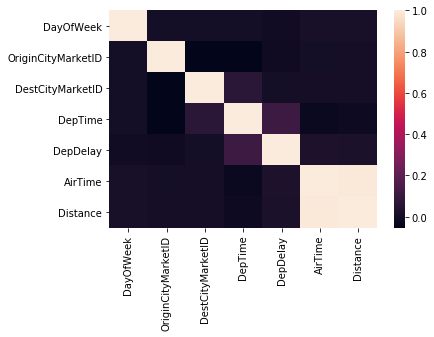

In [119]:
import seaborn as sns

sns.heatmap(df3.corr())

#### Exercise

What is the plane that has the highest average delay? We'll first group by tail number (the *license plate* of a plane) and then calculate the relevant statistic for each group (group of *departures*)

In [122]:
df3['Tail_Number'].nunique()

5392

In [124]:
df3['Tail_Number'][:5]

0    N631NK
1    N620NK
2    N665NK
3    N672NK
4    N671NK
Name: Tail_Number, dtype: object

In [136]:
df3.groupby('Tail_Number')['DepDelay'].mean().sort_values(ascending=False).head(5)

Tail_Number
N216UA    401.666667
N13954    276.000000
N799UA    239.333333
N648UA    236.666667
N225UA    207.000000
Name: DepDelay, dtype: float64

In [141]:
df3['DepDelay'].groupby(df3['Tail_Number'])

Oh, but those numbers smell like these planes had only a few, very delayed, departures! how can we count the number of departures *and* calculate the average delay at the same time?

In [144]:
df3.groupby('Tail_Number')['DepDelay'].agg(['mean', 'count']).sort_values(by='mean', ascending=False).head(5)

,mean,count
Tail_Number,,
N216UA,401.666667,3
N13954,276.000000,2
N799UA,239.333333,3
N648UA,236.666667,6
N225UA,207.000000,2


Awesome! now, let's look at the average delay of the planes with some departures (let's say, at least 15)

In [168]:
delays_per_plane = df3.groupby('Tail_Number')['DepDelay'].agg(['mean', 'count'])

mean_count_delay = delays_per_plane[delays_per_plane['count'] >= 15]
consistently_delayed = mean_count_delay.sort_values(by='mean', ascending=False).head(5)
consistently_delayed

,mean,count
Tail_Number,,
N339JB,110.500000,18
N397AN,74.760000,25
N19130,62.183673,49
N777UA,54.645161,62
N771UA,52.438596,57


In [151]:
df3.loc[df3['Tail_Number'] == 'N339JB']

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
443794,2019-09-01,7,B6,N339JB,2317,BOS,"Boston, MA",Massachusetts,30721,JFK,"New York, NY",New York,31703,703.0,1.0,47.0,187.0
443795,2019-09-02,1,B6,N339JB,450,CLT,"Charlotte, NC",North Carolina,31057,JFK,"New York, NY",New York,31703,NaN,NaN,NaN,541.0
443796,2019-09-02,1,B6,N339JB,676,JFK,"New York, NY",New York,31703,ORH,"Worcester, MA",Massachusetts,33933,435.0,345.0,26.0,150.0
443797,2019-09-02,1,B6,N339JB,1119,JFK,"New York, NY",New York,31703,CLT,"Charlotte, NC",North Carolina,31057,NaN,NaN,NaN,541.0
443798,2019-09-02,1,B6,N339JB,1192,ACK,"Nantucket, MA",Massachusetts,30154,JFK,"New York, NY",New York,31703,2134.0,394.0,47.0,199.0
443799,2019-09-02,1,B6,N339JB,1491,JFK,"New York, NY",New York,31703,ACK,"Nantucket, MA",Massachusetts,30154,547.0,-12.0,36.0,199.0
443800,2019-09-02,1,B6,N339JB,1492,ACK,"Nantucket, MA",Massachusetts,30154,JFK,"New York, NY",New York,31703,734.0,-6.0,38.0,199.0
443801,2019-09-02,1,B6,N339JB,1591,JFK,"New York, NY",New York,31703,ACK,"Nantucket, MA",Massachusetts,30154,1831.0,324.0,42.0,199.0
443802,2019-09-02,1,B6,N339JB,1592,ACK,"Nantucket, MA",Massachusetts,30154,JFK,"New York, NY",New York,31703,1119.0,1.0,41.0,199.0
443803,2019-09-02,1,B6,N339JB,1791,JFK,"New York, NY",New York,31703,ACK,"Nantucket, MA",Massachusetts,30154,924.0,-4.0,45.0,199.0


In [167]:
df3[[ tail_number in consistently_delayed.index for tail_number in df3['Tail_Number'] ]]

,FlightDate,DayOfWeek,Reporting_Airline,Tail_Number,Flight_Number_Reporting_Airline,Origin,OriginCityName,OriginStateName,OriginCityMarketID,Dest,DestCityName,DestStateName,DestCityMarketID,DepTime,DepDelay,AirTime,Distance
281057,2019-09-21,6,AA,N397AN,54,MIA,"Miami, FL",Florida,32467,JFK,"New York, NY",New York,31703,856.0,21.0,145.0,1089.0
284270,2019-09-03,2,AA,N397AN,291,JFK,"New York, NY",New York,31703,MIA,"Miami, FL",Florida,32467,1256.0,-3.0,174.0,1089.0
284289,2019-09-22,7,AA,N397AN,291,JFK,"New York, NY",New York,31703,MIA,"Miami, FL",Florida,32467,1224.0,-5.0,132.0,1089.0
284300,2019-09-03,2,AA,N397AN,291,MIA,"Miami, FL",Florida,32467,JFK,"New York, NY",New York,31703,853.0,3.0,159.0,1089.0
292835,2019-09-13,5,AA,N397AN,1496,PHL,"Philadelphia, PA",Pennsylvania,34100,SJU,"San Juan, PR",Puerto Rico,34819,802.0,-8.0,201.0,1576.0
292845,2019-09-23,1,AA,N397AN,1496,PHL,"Philadelphia, PA",Pennsylvania,34100,SJU,"San Juan, PR",Puerto Rico,34819,804.0,-6.0,195.0,1576.0
292849,2019-09-27,5,AA,N397AN,1496,PHL,"Philadelphia, PA",Pennsylvania,34100,SJU,"San Juan, PR",Puerto Rico,34819,1250.0,280.0,202.0,1576.0
292864,2019-09-13,5,AA,N397AN,1496,SJU,"San Juan, PR",Puerto Rico,34819,PHL,"Philadelphia, PA",Pennsylvania,34100,1254.0,-8.0,211.0,1576.0
292874,2019-09-23,1,AA,N397AN,1496,SJU,"San Juan, PR",Puerto Rico,34819,PHL,"Philadelphia, PA",Pennsylvania,34100,1255.0,-7.0,215.0,1576.0
292878,2019-09-27,5,AA,N397AN,1496,SJU,"San Juan, PR",Puerto Rico,34819,PHL,"Philadelphia, PA",Pennsylvania,34100,831.0,1169.0,193.0,1576.0


#### Exercise: 

Show cities by descending number of airports

In [171]:
df3.groupby('OriginCityName')['Origin'].nunique().sort_values(ascending=False)

OriginCityName
Mobile, AL                        2
Phoenix, AZ                       2
Houston, TX                       2
New York, NY                      2
Columbus, OH                      2
Chicago, IL                       2
Washington, DC                    2
Yuma, AZ                          1
Gillette, WY                      1
Fort Myers, FL                    1
Fort Smith, AR                    1
Fort Wayne, IN                    1
Fresno, CA                        1
Gainesville, FL                   1
Garden City, KS                   1
Grand Island, NE                  1
Grand Forks, ND                   1
Grand Junction, CO                1
Grand Rapids, MI                  1
Great Falls, MT                   1
Green Bay, WI                     1
Greensboro/High Point, NC         1
Greenville, NC                    1
Fort Lauderdale, FL               1
Flagstaff, AZ                     1
Flint, MI                         1
Guam, TT                          1
Dubuque, IA  

#### Exercise

The list above doesn't correspond to our intuitive expectation, probably. That is because airports serving the same general area may be located within several different city limits. This is encapsulated by the "market" concept in commercial aviation.

Find the 10 markets with the most airports, and which airports are included in them and what cities are served by them.

In [180]:
df3.groupby(['OriginCityMarketID'])['Origin'].nunique().sort_values(ascending=False)

OriginCityMarketID
31703    6
32575    5
30721    3
32457    3
30852    3
30647    2
32467    2
31453    2
30194    2
30466    2
33195    2
30977    2
31066    2
33667    2
30562    2
31471    1
31401    1
31468    1
31454    1
31481    1
31503    1
31504    1
31517    1
31447    1
31423    1
35991    1
31295    1
31337    1
31335    1
31076    1
        ..
33570    1
33360    1
33728    1
33785    1
33792    1
33795    1
33830    1
33832    1
33851    1
33367    1
33344    1
33105    1
33214    1
33121    1
33127    1
33139    1
33158    1
33184    1
33192    1
33198    1
33241    1
33342    1
33244    1
33256    1
33264    1
33277    1
33290    1
33304    1
33316    1
30070    1
Name: Origin, Length: 326, dtype: int64

In [185]:
df3.groupby(['OriginCityMarketID'])['Origin'].agg(['nunique', 'unique']).sort_values(by='nunique', ascending=False).head(10)

,nunique,unique
OriginCityMarketID,,
31703,6,"[EWR, LGA, JFK, ISP, HPN, SWF]"
32575,5,"[LAX, BUR, ONT, LGB, SNA]"
32457,3,"[OAK, SFO, SJC]"
30852,3,"[BWI, IAD, DCA]"
30721,3,"[BOS, PVD, MHT]"
33195,2,"[TPA, PIE]"
30466,2,"[PHX, AZA]"
30194,2,"[DFW, DAL]"
33667,2,"[ORF, PHF]"


In [200]:
cities_airports = df3.groupby(['OriginCityMarketID'])[['Origin', 'OriginCityName']].agg(['nunique', 'unique'])

cities_airports.sort_values(by=('Origin', 'nunique'), ascending=False).head(10)

Origin                                 OriginCityName  \
                   nunique                          unique        nunique   
OriginCityMarketID                                                          
31703                    6  [EWR, LGA, JFK, ISP, HPN, SWF]              5   
32575                    5       [LAX, BUR, ONT, LGB, SNA]              5   
32457                    3                 [OAK, SFO, SJC]              3   
30852                    3                 [BWI, IAD, DCA]              2   
30721                    3                 [BOS, PVD, MHT]              3   
33195                    2                      [TPA, PIE]              2   
30466                    2                      [PHX, AZA]              1   
30194                    2                      [DFW, DAL]              2   
33667                    2                      [ORF, PHF]              2   
31453                    2                      [IAH, HOU]              1   

                                                                       
                                                               unique  
OriginCityMarketID                                                     
31703               [Newark, NJ, New York, NY, Islip, NY, White Pl...  
32575               [Los Angeles, CA, Burbank, CA, Ontario, CA, Lo...  
32457                  [Oakland, CA, San Francisco, CA, San Jose, CA]  
30852                                 [Baltimore, MD, Washington, DC]  
30721                    [Boston, MA, Providence, RI, Manchester, NH]  
33195                                 [Tampa, FL, St. Petersburg, FL]  
30466                                                   [Phoenix, AZ]  
30194                             [Dallas/Fort Worth, TX, Dallas, TX]  
33667                    [Norfolk, VA, Newport News/Williamsburg, VA]  
31453                                                   [Houston, TX]

In [199]:
groups = df3.groupby(['OriginCityMarketID'])[['Origin', 'OriginCityName']]
cities_airports = groups.agg({'Origin' : ['nunique', 'unique'], 'OriginCityName' : 'unique'})
cities_airports.sort_values(by=('Origin', 'nunique'), ascending=False).head(10)

Origin                                  \
                   nunique                          unique   
OriginCityMarketID                                           
31703                    6  [EWR, LGA, JFK, ISP, HPN, SWF]   
32575                    5       [LAX, BUR, ONT, LGB, SNA]   
32457                    3                 [OAK, SFO, SJC]   
30852                    3                 [BWI, IAD, DCA]   
30721                    3                 [BOS, PVD, MHT]   
33195                    2                      [TPA, PIE]   
30466                    2                      [PHX, AZA]   
30194                    2                      [DFW, DAL]   
33667                    2                      [ORF, PHF]   
31453                    2                      [IAH, HOU]   

                                                       OriginCityName  
                                                               unique  
OriginCityMarketID                                                     
31703               [Newark, NJ, New York, NY, Islip, NY, White Pl...  
32575               [Los Angeles, CA, Burbank, CA, Ontario, CA, Lo...  
32457                  [Oakland, CA, San Francisco, CA, San Jose, CA]  
30852                                 [Baltimore, MD, Washington, DC]  
30721                    [Boston, MA, Providence, RI, Manchester, NH]  
33195                                 [Tampa, FL, St. Petersburg, FL]  
30466                                                   [Phoenix, AZ]  
30194                             [Dallas/Fort Worth, TX, Dallas, TX]  
33667                    [Norfolk, VA, Newport News/Williamsburg, VA]  
31453                                                   [Houston, TX]

## Plotting

There are several ways in which we could go about plotting this dataset in order to get acquainted with it. 

For example, do the delays have a relationship with the number of departures a plane does?

#### Exercise

Do a scatter plot of delays_by_plane with matplotlib, plotting mean delay versus number of departures. Check the documentation

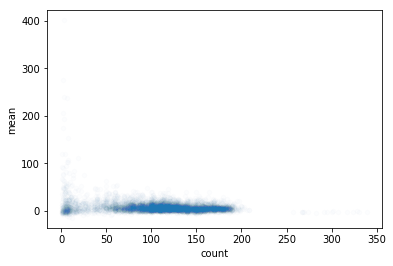

In [213]:
delays_per_plane.plot.scatter('count', 'mean', alpha=.01)

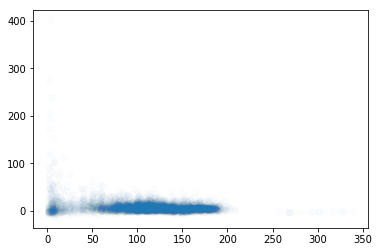

In [214]:
plt.scatter(delays_per_plane['count'], delays_per_plane['mean'], alpha=.01)

Pretty impossible to see anything in there. Maybe a different kind of plottting is required:

(-10, 50)

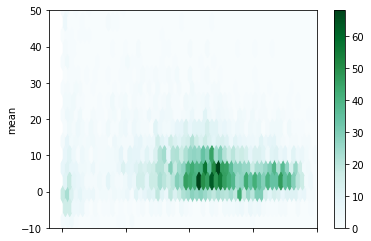

In [216]:
ax = delays_per_plane.plot.hexbin('count', 'mean')
ax.set_xlim(-10, 200)
ax.set_ylim(-10, 50)

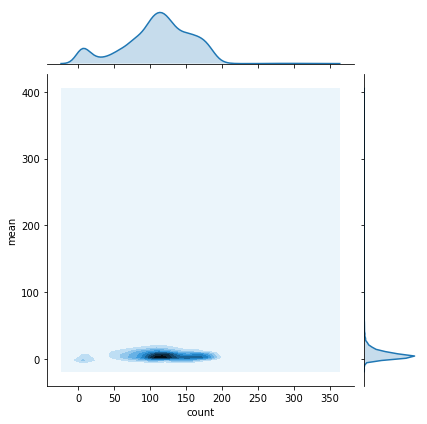

In [219]:
g = sns.jointplot(data=delays_per_plane, x='count', y='mean', kind='kde')


#### Exercise:

Plot the distribution of delays as a histogram, both with a linear and a logarithmic scale

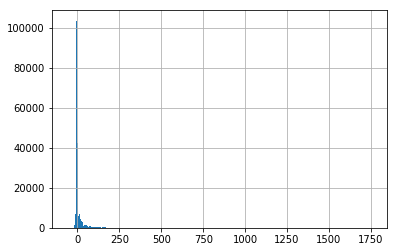

In [223]:
df3['DepDelay'].hist(bins=1000)

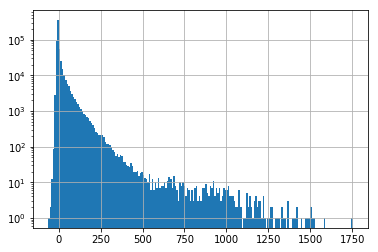

In [226]:
df3['DepDelay'].hist(bins=200, log=True)

#### Exercise:

How do the delays stack over the course of the day? We are going to look at it by plotting the distribution of delays for each hour of the day. The very best way to compare distributions side by side is a boxplot, so we'll use that.

In [227]:
df3['DepTime']

0            NaN
1         2048.0
2         2054.0
3         2044.0
4         2040.0
5         2039.0
6         2040.0
7         2037.0
8         1747.0
9         1753.0
10        2100.0
11        2256.0
12        2041.0
13        2040.0
14        2045.0
15        1752.0
16        1751.0
17        2149.0
18        2040.0
19        2043.0
20        2041.0
21        2049.0
22        1933.0
23        1750.0
24        2038.0
25        2132.0
26        2040.0
27        2036.0
28        2045.0
29         616.0
           ...  
605949    1843.0
605950    1845.0
605951    1843.0
605952    1845.0
605953    1941.0
605954    1847.0
605955    1843.0
605956    1856.0
605957    1853.0
605958    1844.0
605959    1827.0
605960    1857.0
605961    2113.0
605962    1853.0
605963    1858.0
605964    1850.0
605965    1848.0
605966    1841.0
605967    1856.0
605968    1848.0
605969    1842.0
605970    1852.0
605971    1837.0
605972    1849.0
605973    1852.0
605974    1847.0
605975    1857.0
605976    1849

We need to provide `plt.boxplot()` with a sequence that contains 24 elements. Each of those will be a sequence containing every individual delay for one hour of the day. We'll need, therefore, to extract hours of the day for each departure and group based on that.

In [20]:
df3['DepHour'] = df3['DepTime'].astype(str).str.zfill(6).str[:2]
df3['DepHour'].head(5)

/home/dani/anaconda3/envs/master2019/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


0    00
1    20
2    20
3    20
4    20
Name: DepHour, dtype: object

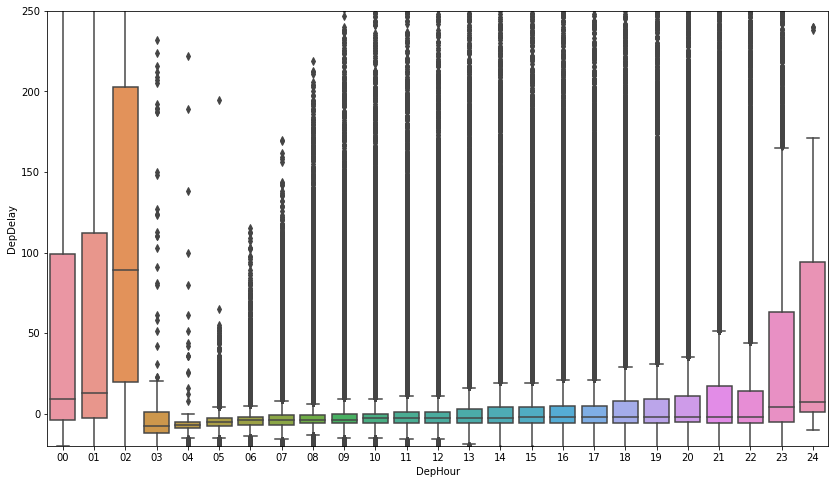

In [25]:
ax = sns.boxplot(data=df3, x='DepHour', y='DepDelay')
ax.set_ylim(-20,250)
plt.gcf().set_size_inches(14,8)

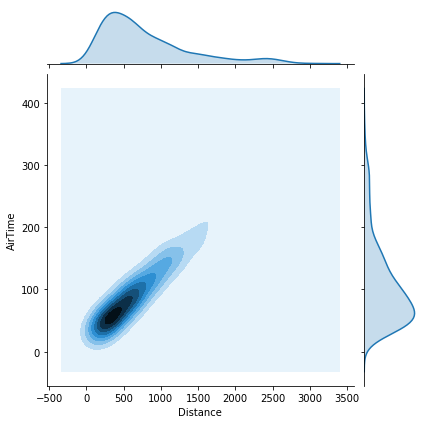

In [29]:
sns.jointplot(data=df3.sample(1000), x='Distance', y='AirTime', kind='kde')

In [38]:
df3['DepHour'] = (df3['DepTime'].dropna() // 100).astype(int)
df3['DepHour'].unique()

/home/dani/anaconda3/envs/master2019/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


array([nan, 20., 17., 21., 22., 19.,  6.,  8.,  7., 10., 11., 12., 13.,
       14., 15., 16., 18., 23.,  5.,  4.,  9.,  0.,  1.,  2.,  3., 24.])

In [37]:
(df3['DepTime'].dropna() // 100).astype(int)

1         20
2         20
3         20
4         20
5         20
6         20
7         20
8         17
9         17
10        21
11        22
12        20
13        20
14        20
15        17
16        17
17        21
18        20
19        20
20        20
21        20
22        19
23        17
24        20
25        21
26        20
27        20
28        20
29         6
32         8
          ..
605949    18
605950    18
605951    18
605952    18
605953    19
605954    18
605955    18
605956    18
605957    18
605958    18
605959    18
605960    18
605961    21
605962    18
605963    18
605964    18
605965    18
605966    18
605967    18
605968    18
605969    18
605970    18
605971    18
605972    18
605973    18
605974    18
605975    18
605976    18
605977    18
605978    20
Name: DepTime, Length: 596198, dtype: int64

#### Exercise

We are also interested in examining how the home base influences delays. Do a boxplot of the delay distribution for the 10 airports with the most flights, and the 10 airports with the least flights.

In [50]:
flights_per_airport = df3.groupby('Origin')['Origin'].count()

bottom_top = pd.concat([flights_per_airport.sort_values(ascending = False).head(10),
                        flights_per_airport.sort_values().head(10)])

bottom_top

Origin
ATL    31952
ORD    29479
DFW    25796
DEN    21885
CLT    19689
LAX    17777
IAH    14778
LGA    14083
LAS    13872
PHX    13627
HYA        3
ADK        8
HGR        9
PPG        9
OGD        9
PSM       11
ELM       14
SMX       18
BFM       21
HTS       22
Name: Origin, dtype: int64

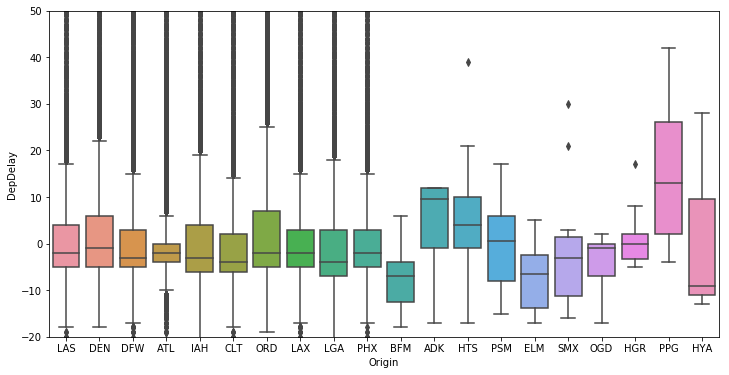

In [57]:
filter = [ origin in bottom_top for origin in df3['Origin'] ]
ax = sns.boxplot(data=df3[filter], x='Origin', y='DepDelay')
ax.set_ylim(-20,50)
plt.gcf().set_size_inches(12,6)

#### Take home project

If we wanted to do some machine learning, we would need to create as many informative features as we thought could be useful. This is called Feature Engineering.

Discrete data would most often be transformed by [one-hot encoding](https://hackernoon.com/what-is-one-hot-encoding-why-and-when-do-you-have-to-use-it-e3c6186d008f), which is [very easy to do in pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.get_dummies.html).

![One Hot Encoding](https://hackernoon.com/photos/4HK5qyMbWfetPhAavzyTZrEb90N2-3o23tie)

With high cardinality discrete data such as airports or, especially, tail numbers, we would be left with many variables, most of which would not be very informative. There are [several options](https://www.datacamp.com/community/tutorials/encoding-methodologies) to deal with this. The most sophisticated is probably vector encoding, but we can do with a very simple approach: [target encoding](https://maxhalford.github.io/blog/target-encoding-done-the-right-way/).

This means that we substitute each value of the discrete variable by the average or median value of the target variable for that value of the independent discrete variable. However! if we want to use this in machine learning for predictions, we would need to use only the previous values.

Target encode the variable 'Origin' and the 'Tail_Number' variable, using for each cell only the values that were available the previous day. In other words: create a `median_delay_origin` variable that contains, for each record, the median delay at that airport _up to the previous day_. Create another one, `median_delay_plane`, with Tail_Number.